In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [5]:
data = []
labels = []
classes = 43

In [7]:
cur_path = cur_path = r"C:\Users\Lenovo\OneDrive\Desktop\Data Science Project\Traffic Sign Recognition"

cur_path

'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Science Project\\Traffic Sign Recognition'

In [9]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [11]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 117s 214ms/step - accuracy: 0.2542 - loss: 4.7422 - val_accuracy: 0.8752 - val_loss: 0.5487
Epoch 2/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 142s 280ms/step - accuracy: 0.7775 - loss: 0.7863 - val_accuracy: 0.9507 - val_loss: 0.2065
Epoch 3/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 146s 287ms/step - accuracy: 0.8645 - loss: 0.4504 - val_accuracy: 0.9676 - val_loss: 0.1455
Epoch 4/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 142s 280ms/step - accuracy: 0.9055 - loss: 0.3240 - val_accuracy: 0.9784 - val_loss: 0.0859
Epoch 5/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 194s 383ms/step - accuracy: 0.9256 - loss: 0.2535 - val_accuracy: 0.9633 - val_loss: 0.1507
Epoch 6/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 187s 365ms/step - accuracy: 0.9351 - loss: 0.2326 - val_accuracy: 0.9851 - val_loss: 0.0637
Epoch 7/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 183s 326ms/step - accuracy: 0.9432 - loss: 0.1979 - val_accuracy: 0.9853 - val_loss: 0.0546
Epoch 8/15
506/506 ━━━━━━━━━━━━━━━━━━━━ 198s 315ms/step - accuracy: 0.9470 -

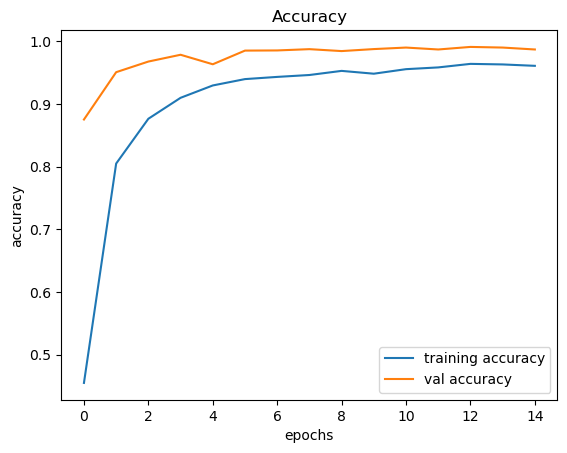

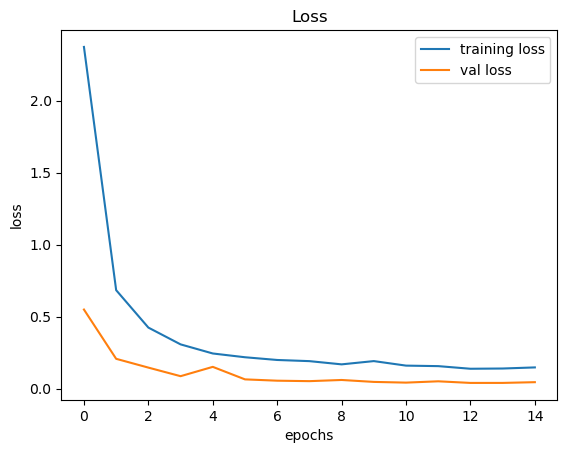

In [13]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [81]:
#testing accuracy on test dataset
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

#y_test = pd.read_csv('Test.csv')
y_test = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Data Science Project\Traffic Sign Recognition\Test.csv")

In [83]:
base_path = r"C:\Users\Lenovo\OneDrive\Desktop\Data Science Project\Traffic Sign Recognition"  # Update this to the correct path

# Update the paths in imgs
labels = y_test["ClassId"].values
imgs = [os.path.join(base_path, img) for img in y_test["Path"].values]
#imgs = y_test["Path"].values


labels
imgs


['C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Science Project\\Traffic Sign Recognition\\Test\\00000.png',
 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Science Project\\Traffic Sign Recognition\\Test\\00001.png',
 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Science Project\\Traffic Sign Recognition\\Test\\00002.png',
 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Science Project\\Traffic Sign Recognition\\Test\\00003.png',
 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Science Project\\Traffic Sign Recognition\\Test\\00004.png',
 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Science Project\\Traffic Sign Recognition\\Test\\00005.png',
 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Science Project\\Traffic Sign Recognition\\Test\\00006.png',
 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Science Project\\Traffic Sign Recognition\\Test\\00007.png',
 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data Science Project\\Traffic Sign Recognition\\Test\\00008.png',
 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Data S

In [97]:
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

data

[array([[[116, 140, 175],
         [116, 138, 171],
         [119, 138, 173],
         ...,
         [102, 119, 150],
         [101, 122, 149],
         [ 93, 112, 139]],
 
        [[116, 142, 177],
         [116, 141, 175],
         [117, 141, 174],
         ...,
         [120, 143, 178],
         [122, 144, 176],
         [122, 142, 174]],
 
        [[118, 142, 174],
         [116, 141, 175],
         [114, 140, 172],
         ...,
         [121, 144, 181],
         [122, 144, 180],
         [119, 142, 178]],
 
        ...,
 
        [[117, 137, 168],
         [115, 135, 165],
         [116, 135, 164],
         ...,
         [116, 138, 170],
         [116, 136, 168],
         [118, 139, 171]],
 
        [[116, 136, 166],
         [115, 134, 167],
         [115, 133, 165],
         ...,
         [114, 135, 168],
         [116, 136, 166],
         [115, 139, 167]],
 
        [[112, 135, 166],
         [111, 134, 165],
         [119, 135, 166],
         ...,
         [115, 137, 166],
  

In [105]:
# Predict the class probabilities
predictions = model.predict(X_test)  # Get raw probabilities

# Convert probabilities to class indices
pred = np.argmax(predictions, axis=1)  # Get the class with the highest probability

# Calculate accuracy
accuracy = accuracy_score(labels, pred)  # Compare predicted classes to true labels
print(f"Accuracy: {accuracy * 100:.2f}%")


395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
Accuracy: 95.72%


In [109]:
model.save('traffic_classifier.h5')